# In this problem you do not have to predict actual price but a price range indicating how high the price is

# Sergey Lagov IU8-82

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Сперва немного изучим датасеты
TRAIN_FILENAME = 'mobile_train.csv'
TEST_FILENAME = 'mobile_test.csv'

dfTrain = pd.read_csv(TRAIN_FILENAME)
dfTest = pd.read_csv(TEST_FILENAME)

dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [241]:
# в задании на кегле сказано, что нам надо предсказать диапазон цены — в тестовой выборке нет параметры диапазона цены — будем работать только в рамках тренировочного сета
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [242]:
df = dfTrain
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [243]:
TARGET = 'price_range'
df[TARGET].unique()

array([1, 2, 3, 0])

<Axes: xlabel='price_range', ylabel='count'>

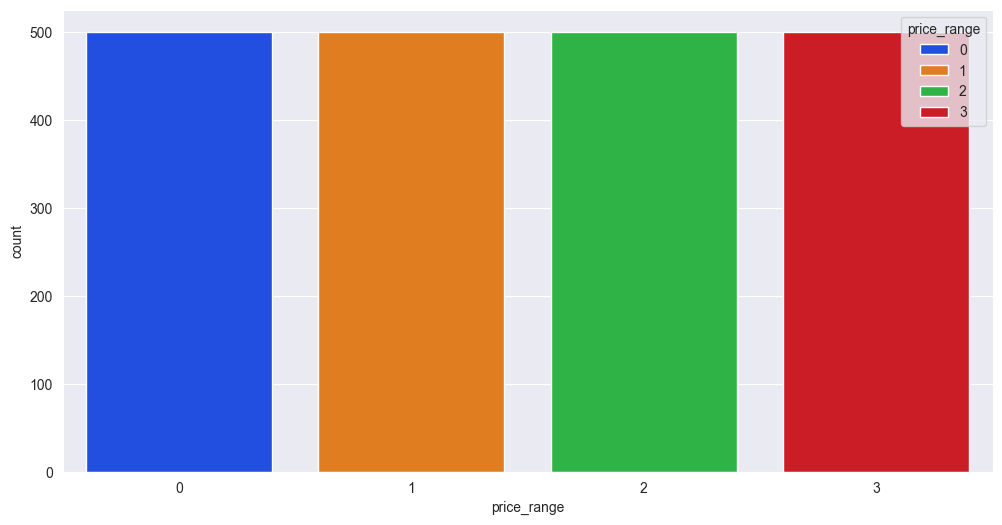

In [244]:
# проверка соотношения таргета — диапазон цены
plt.figure(figsize=(12, 6))
sns.countplot(x=TARGET, data=df, palette='bright', hue=TARGET)

In [245]:
print(df[TARGET].value_counts())
# классы буквально поровну разделены — ок

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [246]:
# из mobile_test выделим тестовый набор
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# разделение данных
RANDOM_STATE = 37
# Всего 2000 записей, 0.3 * 2000 = 600 — на тесты, 2000 - 600 = 1400 — на обучение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

print(f'Xtrain {len(X_train)}, Xtest {len(X_test)}, y_train {len(y_train)}, y_test {len(y_test)}')
# стандартизация данных для лучшей работы моделей
# Основная цель применения StandardScaler заключается в том, чтобы привести признаки к стандартному нормальному распределению со средним значением 0 и дисперсией 1
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Xtrain 1400, Xtest 600, y_train 1400, y_test 600


In [247]:
# 1 Логистическая регрессия — замечательно!
# среди 'multinomial', 'ovr' или 'auto' выбрали multinomial (он же auto) — он лучший
# параметры на веса + смещение, потом в функцию активации, смотрим на вероятность принадлежности — чиназес
model = LogisticRegression(multi_class='multinomial')

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(f'Logistic Regression Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Logistic Regression Classification Report:\n{classification_report(y_test, y_pred)}')

Logistic Regression Confusion Matrix:
[[144   1   0   0]
 [  5 133   4   0]
 [  0   8 159   2]
 [  0   0   2 142]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       145
           1       0.94      0.94      0.94       142
           2       0.96      0.94      0.95       169
           3       0.99      0.99      0.99       144

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600


In [248]:
# 2 Дерево решений — хорошо
# 3 Случайный лес не делаем, поскольку дерево решение окейно отработало, методы очень схожи
tree = DecisionTreeClassifier(max_depth=5, random_state=17) # multi_class тут не нужен
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [249]:
y_pred = tree.predict(X_test)

print(f'Decision Tree Classifier Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Decision Tree Classifier Classification Report:\n{classification_report(y_test, y_pred)}')

Decision Tree Classifier Confusion Matrix:
[[134  11   0   0]
 [  9 111  22   0]
 [  0  25 124  20]
 [  0   0  15 129]]
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       145
           1       0.76      0.78      0.77       142
           2       0.77      0.73      0.75       169
           3       0.87      0.90      0.88       144

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600


In [250]:
# 4 Метод опорных векторов — отлично
# SVM (Support Vector Machine) и SVC (Support Vector Classification)
# Создаем гиперплоскость
# linear —  accuracy 0.96
# poly — accuracy 0.79
# rbf — 0.87
model = SVC(kernel='linear') # с linear работает лучше

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(f'svm Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'svm Classification Report:\n{classification_report(y_test, y_pred)}')

svm Confusion Matrix:
[[144   1   0   0]
 [  7 129   6   0]
 [  0   7 160   2]
 [  0   0   3 141]]
svm Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       145
           1       0.94      0.91      0.92       142
           2       0.95      0.95      0.95       169
           3       0.99      0.98      0.98       144

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600


In [251]:
# 5.1 Наивный количественный Байесовский классификатор — нормально
dfcopy = df.copy()

df = df.drop('blue', axis=1)
df = df.drop('dual_sim', axis=1)
df = df.drop('four_g', axis=1)
df = df.drop('three_g', axis=1)
df = df.drop('touch_screen', axis=1)
df = df.drop('wifi', axis=1)

X = df.copy()

# разделение данных
RANDOM_STATE = 37
# Всего 2000 записей, 0.3 * 2000 = 600 — на тесты, 2000 - 600 = 1400 — на обучение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = GaussianNB()

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(f'Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}')

Naive Bayes Confusion Matrix:
[[145   0   0   0]
 [  0 142   0   0]
 [  0   0 169   0]
 [  0   0   0 144]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       169
           3       1.00      1.00      1.00       144

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600


In [252]:
# 5.2 Наивный категориальный Байесовский классификатор — нормально
df = dfcopy.copy()

df = df.drop('battery_power', axis=1)
df = df.drop('clock_speed', axis=1)
df = df.drop('fc', axis=1)
df = df.drop('int_memory', axis=1)
df = df.drop('m_dep', axis=1)
df = df.drop('mobile_wt', axis=1)
df = df.drop('n_cores', axis=1)
df = df.drop('pc', axis=1)
df = df.drop('px_height', axis=1)
df = df.drop('px_width', axis=1)
df = df.drop('ram', axis=1)
df = df.drop('sc_h', axis=1)
df = df.drop('sc_w', axis=1)
df = df.drop('talk_time', axis=1)

X = df.copy()

# разделение данных
RANDOM_STATE = 37
# Всего 2000 записей, 0.3 * 2000 = 600 — на тесты, 2000 - 600 = 1400 — на обучение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = CategoricalNB()

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(f'Naive Bayes Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Naive Bayes Classification Report:\n{classification_report(y_test, y_pred)}')

Naive Bayes Confusion Matrix:
[[ 36  75  34   0]
 [ 41  73  28   0]
 [ 44  88  37   0]
 [  0   0   0 144]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.25      0.27       145
           1       0.31      0.51      0.39       142
           2       0.37      0.22      0.28       169
           3       1.00      1.00      1.00       144

    accuracy                           0.48       600
   macro avg       0.50      0.50      0.48       600
weighted avg       0.49      0.48      0.47       600
